# The Sinusoid

Now let's try to get a sinusoid. We can't do that with a single derivative -- we need a second-order equation. It looks like
$$ \frac{d^2 y}{d t^2} = - \omega^2 y$$
But `odeint` doesn't say anything about second derivatives. How are we supposed to solve this?

The trick is, we're allowed to have many variables. So let's define a new variable
$$v_y = \frac{d y}{d t}$$

If we take another derivative, we get:
$$\frac{d v_y}{d t} = \frac{d^2 y}{d t}$$

Now we can re-write the above equation as two pieces:
$$\begin{align}
\frac{d v_y}{d t} &= -\omega^2 y \\
\frac{d y}{d t} &= v_y
\end{align}$$

This trick is used *very* often, anytime there are second derivatives (or higher). We've gone from one second-order equation to two first-order equations. Our new variable is the velocity.

The main change is in the derivative function. The first argument is now an array of `[y, v_y]`. You can think of this array as 'the state of the world'. It's not just the position, but also the velocity. The function needs to look at that state, and calculate the derivative of each thing. The derivative of $y$ is $v_y$ by definition.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# A new import - scipy's basic ODE integration function
from scipy.integrate import odeint

In [33]:
times2 = np.linspace(0.,200.,10000)

## Exercise

Define the derivative function, solve, and plot. You can set $\omega = 0.1$ for now.

In [35]:
# The derivative function become
omega = 0.1
def deriv2(state, t):
    y, vy = state # Split the state into named variables for convenience
    dydt = vy
    dvydt = -omega**2 * y
    return (dydt, dvydt) # Return a tuple of the derivatives.

In [36]:
y_init2 = (1., 0.) # Starting value for y, vy at t = 0

In [37]:
yarr2 = odeint(deriv2, y_init2, times2)
print("The output has shape", yarr2.shape)

The output has shape (10000, 2)


The result now has two variables, each one is its own column. Each time is a row. We can use numpy's multi-dimensional slicing to access just the first variable by doing

yarr2\[:, 0\]

In the first slot, we put the slice operator ':' all by itself. This just means take all the data in that dimension. Then we specify that we want column zero, which is the first variable since Python counts from zero.

Text(0.5, 0, 't')

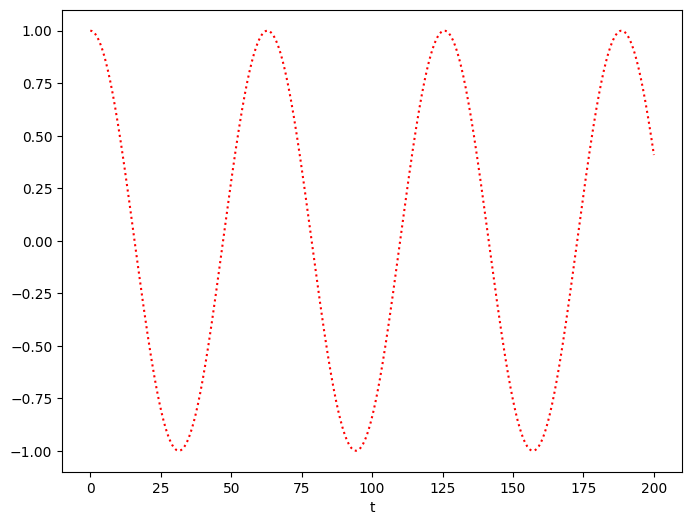

In [38]:
plt.figure(figsize=(8,6))
plt.plot(times2, yarr2[:,0], 'r:')
plt.xlabel('t')

## Exercise

One fancy thing we can do is a phase plot. Instead of $y$ versus $t$, plot $y$ versus $v_y$. This is often useful for dynamic and chaotic systems. Make this plot.

Text(0, 0.5, 'v_y')

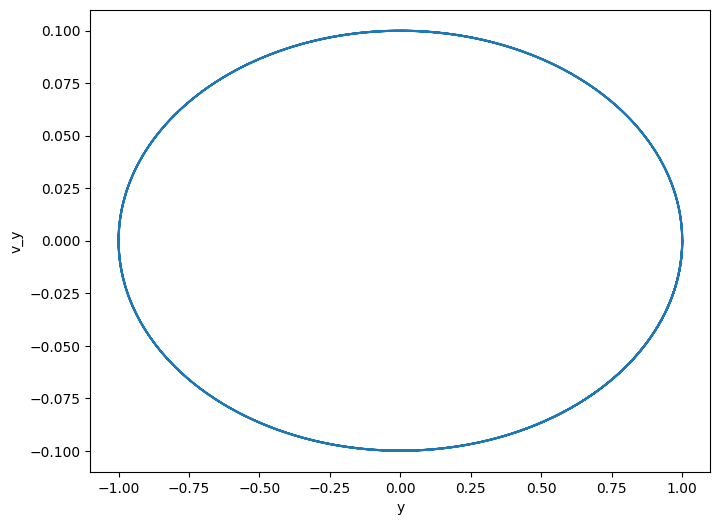

In [39]:
# Answer here
plt.figure(figsize=(8,6))
plt.plot(yarr2[:,0], yarr2[:,1])
plt.xlabel('y')
plt.ylabel('v_y')

## Exercise

What do you change to double the amplitude?

Text(0.5, 0, 't')

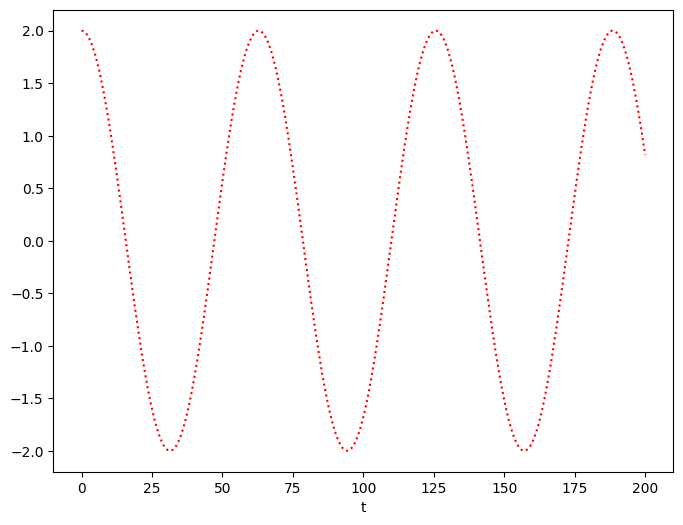

In [40]:
# Answer here
y_init2a = (2., 0.)
yarr2a = odeint(deriv2, y_init2a, times2)

plt.figure(figsize=(8,6))
plt.plot(times2, yarr2a[:,0], 'r:')
plt.xlabel('t')

## Exercise

Can you change the result in y from a cosine to a sine, only by modifying the initial conditions? Hint: A sine starts at zero, but it has some initial slope. Once again, you're changing the input to the solver.

In [41]:
# Answer here
# Need to find a valye for y and vy
# Have been told that y = 0
# The derivative of sin(w t) is w cos(w t)
# vy = dy/dt = omega
y_init2b = (0., omega)
yarr2b = odeint(deriv2, y_init2b, times2)

Text(0.5, 0, 't')

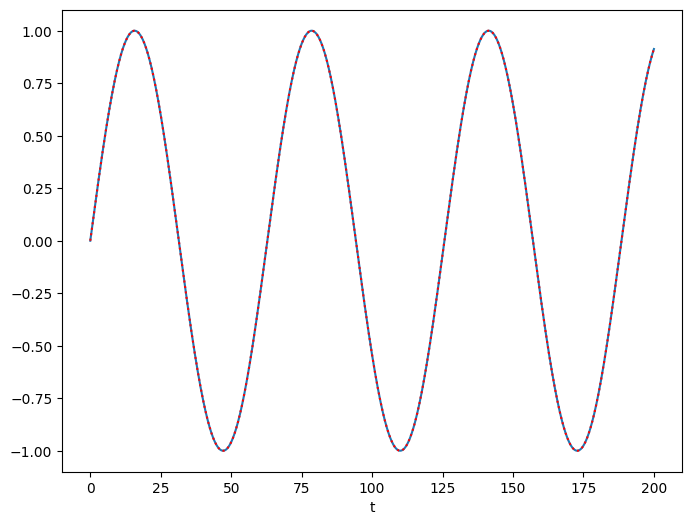

In [42]:
plt.figure(figsize=(8,6))
plt.plot(times2, np.sin(omega*times2))
plt.plot(times2, yarr2b[:,0], 'r:')
plt.xlabel('t')

## Exercise

Can you change the frequency in the same way? If not, how do you change it?

In [ ]:
# Answer here
# You can't change w in the same way
# A change of w amounts to a different setup, i.e. changing the spring in an oscillating system

## Exercise

Copying the example from above, can you modify the equation to add damping (set $\gamma$ = 0.01)? The result should be a decaying sinusoid.

In [43]:
# Answer here
gamma = 0.01
def deriv2a(state, t):
    y, vy = state # Split the state into named variables for convenience
    dydt = vy
    dvydt = -omega**2 * y - gamma * vy
    return (dydt, dvydt) # Return a tuple of the derivatives.

In [46]:
y_init2a = (1., 0.) # Same initial conditions
yarr2a = odeint(deriv2a, y_init2a, times2)

Text(0.5, 0, 't')

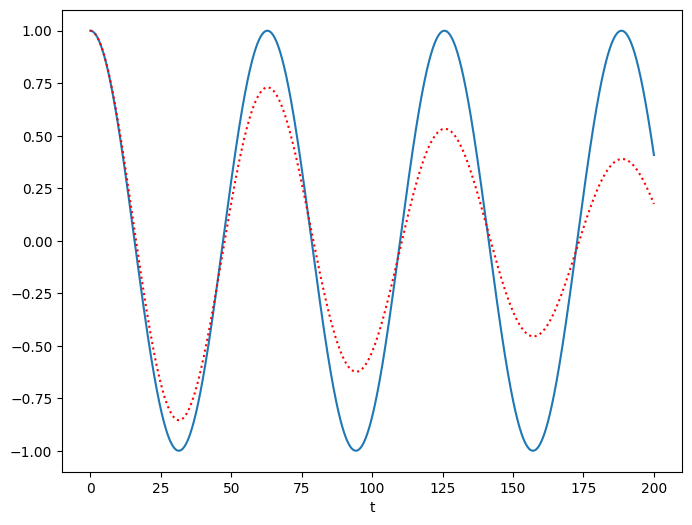

In [47]:
plt.figure(figsize=(8,6))
plt.plot(times2, np.cos(omega*times2))
plt.plot(times2, yarr2a[:,0], 'r:')
plt.xlabel('t')